# Do Unions Really Make a difference in peoples lives?
## Comparing Wages of those represented by a union and those who are not.

In [ ]:
from typing import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

_NB_DIR = os.path.dirname(os.path.abspath('__file__'))
plt.style.use(os.path.join(_NB_DIR, 'my_notebook.mplstyle'))

In [54]:
df = pd.read_csv('~/Downloads/14100066-eng/stat_union_data.csv', sep = ',')
df

/tmp/ipykernel_340996/2365490466.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('~/Downloads/14100066-eng/stat_union_data.csv', sep = ',')


,REF_DATE,GEO,DGUID,Wages,Job permanency,Union coverage,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997,Canada,2021A000011124,"Total employees, all wages","Total employees, permanent and temporary","Total employees, covered and not covered by union",Total - Gender,15 years and over,Persons in thousands,428,thousands,3,v2108919,1.1.1.1.1.1,11364.50,NaN,NaN,NaN,1
1,1997,Canada,2021A000011124,"Total employees, all wages","Total employees, permanent and temporary","Total employees, covered and not covered by union",Total - Gender,15 to 24 years,Persons in thousands,428,thousands,3,v2109414,1.1.1.1.1.2,1877.80,NaN,NaN,NaN,1
2,1997,Canada,2021A000011124,"Total employees, all wages","Total employees, permanent and temporary","Total employees, covered and not covered by union",Total - Gender,25 to 54 years,Persons in thousands,428,thousands,3,v2107929,1.1.1.1.1.3,8590.90,NaN,NaN,NaN,1
3,1997,Canada,2021A000011124,"Total employees, all wages","Total employees, permanent and temporary","Total employees, covered and not covered by union",Total - Gender,55 years and over,Persons in thousands,428,thousands,3,v2108424,1.1.1.1.1.4,895.80,NaN,NaN,NaN,1
4,1997,Canada,2021A000011124,"Total employees, all wages","Total employees, permanent and temporary","Total employees, covered and not covered by union",Men+,15 years and over,Persons in thousands,428,thousands,3,v2110899,1.1.1.1.2.1,5954.50,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166315,2024,British Columbia,2021A000259,Median weekly wage rate,Temporary employees,No union coverage,Men+,55 years and over,Current dollars,75,units,0,v2110896,11.5.3.3.2.4,805.00,NaN,NaN,NaN,2
166316,2024,British Columbia,2021A000259,Median weekly wage rate,Temporary employees,No union coverage,Women+,15 years and over,Current dollars,75,units,0,v2113371,11.5.3.3.3.1,600.00,NaN,NaN,NaN,2
166317,2024,British Columbia,2021A000259,Median weekly wage rate,Temporary employees,No union coverage,Women+,15 to 24 years,Current dollars,75,units,0,v2113866,11.5.3.3.3.2,400.00,NaN,NaN,NaN,2
166318,2024,British Columbia,2021A000259,Median weekly wage rate,Temporary employees,No union coverage,Women+,25 to 54 years,Current dollars,75,units,0,v2112381,11.5.3.3.3.3,810.00,NaN,NaN,NaN,2


In [55]:
union_data_meta = pd.read_csv('~/Downloads/14100066-eng/union_data_meta.csv', sep = ',')
union_data_meta

,Cube Title,Product Id,CANSIM Id,URL,Cube Notes,Archive Status,Frequency,Start Reference Period,End Reference Period,Total number of dimensions
"Employee wages by job permanency and union coverage, annual",14100066,282-0074,https://www150.statcan.gc.ca/t1/tbl1/en/tv.act...,7;9,CURRENT - a cube available to the public and t...,Annual,1997-01-01,2024-01-01,6.0,NaN
Dimension ID,Dimension name,Dimension Notes,Dimension Definitions,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geography,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wages,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Job permanency,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8,Excluding the territories.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Starting in 2006, enhancements to the Labour F...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Gender refers to an individual's personal and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,"Given that the non-binary population is small,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_1997 = df[df['REF_DATE'] == 1997]
df_1997 = df_1997[df_1997['COORDINATE'] == "1.2.3.3.1.1"]

df_1997
# Dimensions

# 1.2.3.4.5.6 <- Dimension Order
# 1 <- Geography (Canada Default)
# 2 <- Wages (2 - Average Hourly Wage Rate, 4 - Median Hourly Wage Rate)
# 3 <- Job Permanency (1 - Perm and Temp, 2 - Perm, 3 - Temp)
# 4 <- Coverage (1 - Covered and Not, 2 - Covered, 3 - Not Covered)
# 5 <- Gender (1 - Both, 2 - Men, 3 - Women)
# 6 <- Age Group (1 - 15+, 2 - 15-24, 3 - 25-54, 4 - 55+)

# All Employees:
# 1.2.1.1.1.1 <- Total Employees Perm and Temp, Covered and Not Covered
# 1.2.1.2.1.1 <- Total Employees Perm and Temp, Covered
# 1.2.1.3.1.1 <- Total Employees Perm and Temp, Not Covered

# Permanent Employees:
# 1.2.2.1.1.1 <- Total Employees Perm, Covered and Not Covered
# 1.2.2.2.1.1 <- Total Employees Perm, Covered
# 1.2.2.3.1.1 <- Total Employees Perm, Not Covered

# Temp Employees:
# 1.2.3.1.1.1 <- Total Employees Temp, Covered and Not Covered
# 1.2.3.2.1.1 <- Total Employees Temp, Covered
# 1.2.3.3.1.1 <- Total Employees Temp, Not Covered

,REF_DATE,GEO,DGUID,Wages,Job permanency,Union coverage,Gender,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
204,1997,Canada,2021A000011124,Average hourly wage rate,Temporary employees,No union coverage,Total - Gender,15 years and over,Current dollars,75,units,0,v2109357,1.2.3.3.1.1,10.67,NaN,NaN,NaN,2


In [57]:
def get_wage(year, coordinate):
    return df.loc[(df["REF_DATE"] == year) & (df["COORDINATE"] == coordinate), "VALUE"].values[0]

In [61]:
# Totals: Perm: Union, Not Union, Temp: Union, Not Union

perm_union = "1.2.2.2.1.1"
perm_non = "1.2.2.3.1.1"
temp_union = "1.2.3.2.1.1"
temp_non = "1.2.3.3.1.1"

wages = {}

for year in range(1997, 2024+1):
    perm_u = get_wage(year, perm_union)
    perm_n = get_wage(year, perm_non)
    temp_u = get_wage(year, temp_union)
    temp_n = get_wage(year, temp_non)

    wages[year] = perm_u, perm_n, temp_u, temp_n

wages_df = pd.DataFrame.from_dict(wages, orient='index', columns=['perm_u', 'perm_n', 'temp_u', 'temp_n'])

wages_df

,perm_u,perm_n,temp_u,temp_n
1997,18.68,14.60,16.84,10.67
1998,18.87,14.93,16.81,10.56
1999,19.29,15.40,16.78,10.87
2000,19.71,16.01,17.17,11.03
2001,20.14,16.65,17.76,11.53
2002,20.78,17.04,18.31,11.74
2003,21.24,17.35,18.79,12.09
2004,21.88,17.80,19.10,12.46
2005,22.43,18.41,19.93,12.98
2006,23.47,19.56,20.93,13.76


## Hypothesis on Unionize vs Non-Unionized workplace wages

### H0 -> Unionized Employees make <= Non Unionized Employees
### H1 -> Unionized Employees make > Non Unionized Employees
#### a = 0.05
#### Using a Two-sample t-test

##### Permanent Employees
t = (26.88 - 22.96) / (sqrt( 5.67^2 / 28  + 5.92^2 / 28 ))

t = 2.53

t_critical = 1.674

2.53 > 1.674

##### Temp Employees
t = (24.17 - 16.29) / (sqrt( 5.32^2 / 28 + 4.26^2 / 28 ))

t = 6.10

t_critical = 1.674

6.10 > 1.674

We reject the null Hypothesis because there is significant evidence that permanent and temporary union workers earn more than non-union workers.

For Permanent Employees -> Union wins
For Temp Employees -> Union wins BIG time

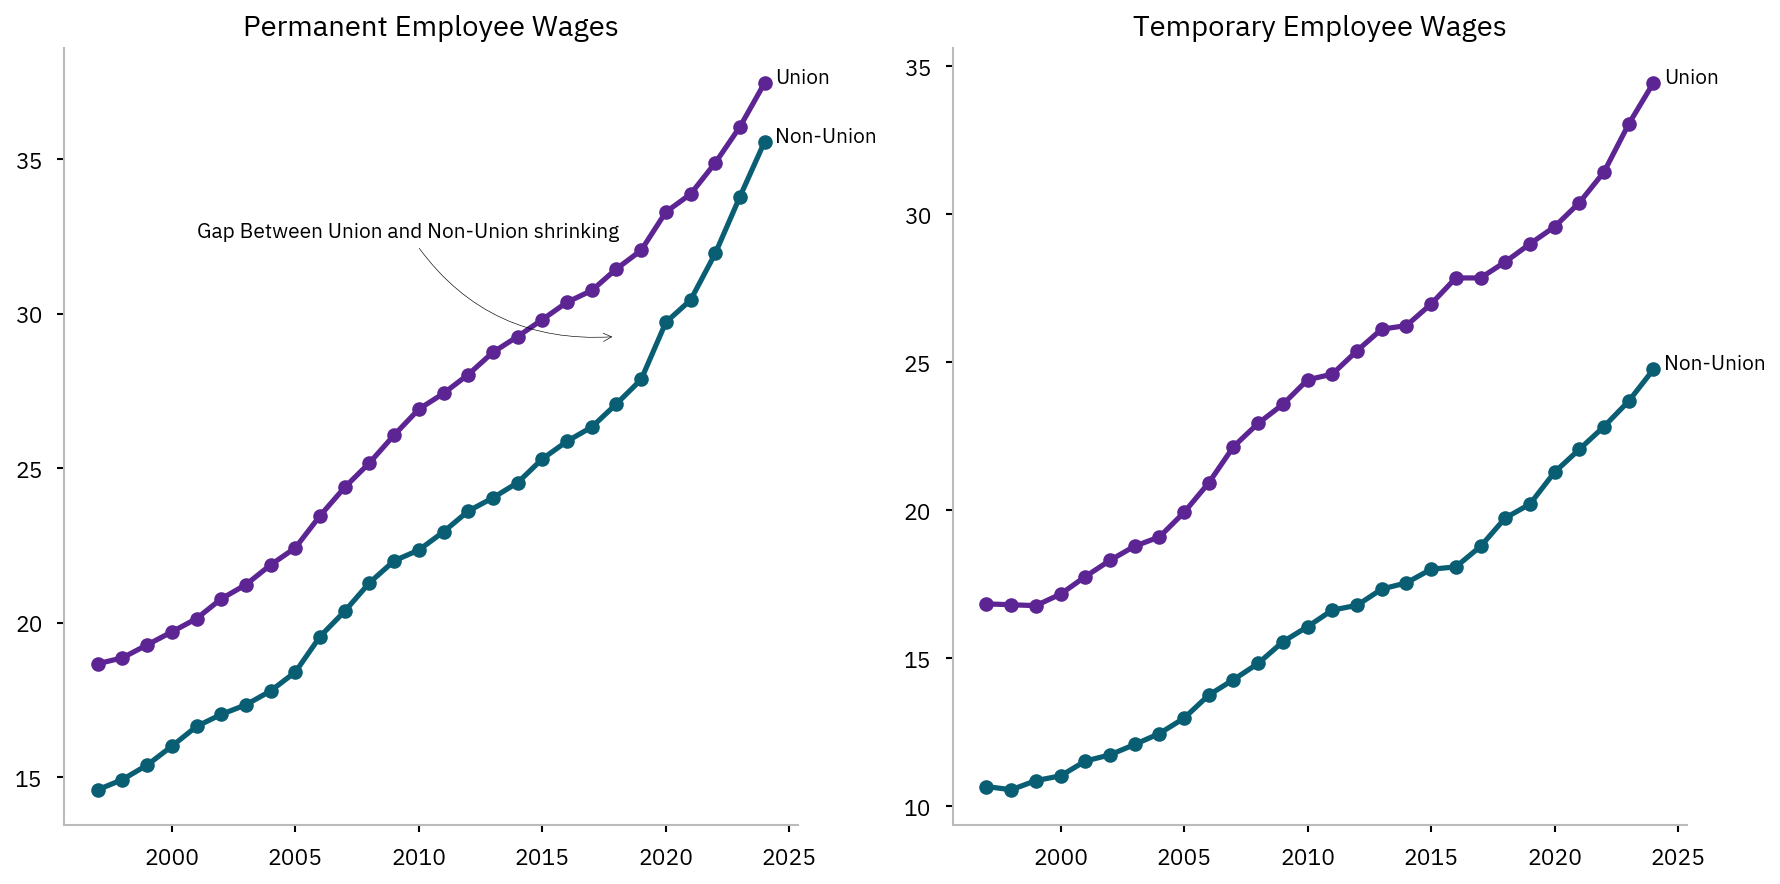

In [87]:
# Plotting Permanent and Temp Employee Graphs over time

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.plot(wages_df.index, wages_df['perm_u'], label = 'Union', marker = 'o')
ax1.plot(wages_df.index, wages_df['perm_n'], label = 'Non-Union', marker = 'o')
ax1.title.set_text("Permanent Employee Wages")

ax1.annotate("Union", xy = (wages_df.index.values[-1], wages_df['perm_u'].values[-1]), xytext = (5,0), textcoords = "offset points")
ax1.annotate("Non-Union", xy = (wages_df.index.values[-1], wages_df['perm_n'].values[-1]), xytext = (5,0), textcoords = "offset points")

ax1.annotate("Gap Between Union and Non-Union shrinking",
             xy = (wages_df.index.values[-7],  29.27), #2018
             xytext = (wages_df.index.values[-24], 32.5),
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3,rad=0.3"),
             fontsize = 10
             )

ax2.plot(wages_df.index, wages_df['temp_u'], label = 'Union', marker = 'o')
ax2.plot(wages_df.index, wages_df['temp_n'], label = 'Non-Union', marker = 'o')
ax2.title.set_text("Temporary Employee Wages")

ax2.annotate("Union", xy = (wages_df.index.values[-1], wages_df['temp_u'].values[-1]), xytext = (5,0), textcoords = "offset points")
ax2.annotate("Non-Union", xy = (wages_df.index.values[-1], wages_df['temp_n'].values[-1]), xytext = (5,0), textcoords = "offset points")

plt.tight_layout()
plt.show()

### Union Benefits by Gender, Province, and Age Range
#### Hypothesis:

- Younger workers have a greater benefit from union membership
- The benefit is equal for men and women

In [103]:
# Extract Data by Province:

# Need to change the first character to change geographic information
perm_union = "1.2.2.2.1.1"
perm_non = "1.2.2.3.1.1"
temp_union = "1.2.3.2.1.1"
temp_non = "1.2.3.3.1.1"

# Geographic information:
# 1 - Canada, 2 - Newfoundland, 3 - PEI, 4 - Nova Scotia, 5 - New Brunswick, 6 - Quebec
# 7 - Ontario, 8 - Manitoba, 9 - Saskatchewan, 10 - Alberta, 11 - British Columbia

provinces = {
    2 : "Newfoundland",
    3 : "PEI",
    4 : "Nova Scotia",
    5 : "New Brunswick",
    6 : "Quebec",
    7 : "Ontario",
    8 : "Manitoba",
    9 : "Saskatchewan",
    10: "Alberta",
    11: "British Columbia"
}

provincial_data = {}
idx = 0


for key, value in provinces.items():
    perm_union_coord = str(key) + perm_union[1:]
    perm_non_coord = str(key) + perm_non[1:]
    temp_union_coord = str(key) + temp_union[1:]
    temp_non_coord = str(key) + temp_non[1:]

    for year in range(1997, 2024+1):
        perm_u = get_wage(year, perm_union_coord)
        perm_n = get_wage(year, perm_non_coord)
        perm_benefit = perm_u - perm_n

        temp_u = get_wage(year, temp_union_coord)
        temp_n = get_wage(year, temp_non_coord)
        temp_benefit = temp_u - temp_n

        province = value

        provincial_data[idx] = year, province, perm_u, perm_n, temp_u, temp_n, perm_benefit, temp_benefit
        idx += 1

df_provincial_data = pd.DataFrame.from_dict(
    provincial_data,
    orient='index',
    columns=['year', 'province', 'perm_u', 'perm_n', 'temp_u', 'temp_n', 'perm_benefit', 'temp_benefit']
)

df_provincial_data

,year,province,perm_u,perm_n,temp_u,temp_n,perm_benefit,temp_benefit
0,1997,Newfoundland,16.76,11.63,15.20,8.84,5.13,6.36
1,1998,Newfoundland,16.97,11.69,14.41,8.44,5.28,5.97
2,1999,Newfoundland,17.01,11.66,14.43,9.06,5.35,5.37
3,2000,Newfoundland,17.70,12.42,15.01,9.65,5.28,5.36
4,2001,Newfoundland,18.36,12.92,15.54,9.91,5.44,5.63
...,...,...,...,...,...,...,...,...
275,2020,British Columbia,33.21,29.95,29.84,21.04,3.26,8.80
276,2021,British Columbia,34.30,31.08,30.27,23.65,3.22,6.62
277,2022,British Columbia,35.14,32.76,31.03,23.97,2.38,7.06
278,2023,British Columbia,37.22,34.94,34.01,25.40,2.28,8.61


In [104]:
# By Age Group Data extraction:

# Need to change the sixth character to change geographic information
perm_union = "1.2.2.2.1.1"
perm_non = "1.2.2.3.1.1"
temp_union = "1.2.3.2.1.1"
temp_non = "1.2.3.3.1.1"

# Age information:
# 15-24yrs - 2, 25-54yrs - 3, 55yrs+ - 4, ALL AGES - 1

age_groups = {
    2 : "15 - 24yrs",
    3 : "25 - 54yrs",
    4 : "55yrs +"
}

age_data = {}
idx = 0

for key, value in age_groups.items():
    perm_union_coord = perm_union[:-1] + str(key)
    perm_non_coord = perm_non[:-1] + str(key)
    temp_union_coord = temp_union[:-1] + str(key)
    temp_non_coord = temp_non[:-1] + str(key)

    for year in range(1997, 2024+1):
        perm_u = get_wage(year, perm_union_coord)
        perm_n = get_wage(year, perm_non_coord)
        perm_benefit = perm_u - perm_n

        temp_u = get_wage(year, temp_union_coord)
        temp_n = get_wage(year, temp_non_coord)
        temp_benefit = temp_u - temp_n

        age_group = value

        age_data[idx] = year, age_group, perm_u, perm_n, temp_u, temp_n, perm_benefit, temp_benefit
        idx += 1

df_age_groups = pd.DataFrame.from_dict(
    age_data,
    orient='index',
    columns=['year','age_group', 'perm_u', 'perm_n', 'temp_u', 'temp_n', 'perm_benefit', 'temp_benefit']
)
df_age_groups



,year,age_group,perm_u,perm_n,temp_u,temp_n,perm_benefit,temp_benefit
0,1997,15 - 24yrs,11.29,8.65,11.77,8.25,2.64,3.52
1,1998,15 - 24yrs,11.44,8.93,11.82,8.26,2.51,3.56
2,1999,15 - 24yrs,11.64,9.13,11.99,8.49,2.51,3.50
3,2000,15 - 24yrs,11.89,9.49,11.96,8.67,2.40,3.29
4,2001,15 - 24yrs,12.03,9.88,11.76,8.90,2.15,2.86
...,...,...,...,...,...,...,...,...
79,2020,55yrs +,33.27,30.79,33.81,25.42,2.48,8.39
80,2021,55yrs +,33.46,31.76,33.67,26.90,1.70,6.77
81,2022,55yrs +,34.30,32.92,34.67,28.28,1.38,6.39
82,2023,55yrs +,35.22,34.67,37.56,29.49,0.55,8.07


In [110]:
# Filtering by Gender

# Need to change the fifth character to change geographic information
perm_union = "1.2.2.2.1.1"
perm_non = "1.2.2.3.1.1"
temp_union = "1.2.3.2.1.1"
temp_non = "1.2.3.3.1.1"

# Men = 2, Women = 3
genders = {
    2 : "Male",
    3 : "Female",
}

genders_data = {}
idx = 0
for key, value in genders.items():
    perm_union_coord = perm_union[:8] + str(key) + perm_union[9:]
    perm_non_coord = perm_non[:8] + str(key) + perm_non[9:]
    temp_union_coord = temp_union[:8] + str(key) + temp_union[9:]
    temp_non_coord = temp_non[:8] + str(key) + temp_non[9:]

    for year in range(1997, 2024+1):
        perm_u = get_wage(year, perm_union_coord)
        perm_n = get_wage(year, perm_non_coord)
        perm_delta = perm_u - perm_n

        temp_u = get_wage(year, temp_union_coord)
        temp_n = get_wage(year, temp_non_coord)
        temp_delta = temp_u - temp_n

        gender = value
        genders_data[idx] = year, gender, perm_u, perm_n, temp_u, temp_n, perm_delta, temp_delta
        idx += 1


df_gender_data = pd.DataFrame.from_dict(
    genders_data,
    orient='index',
    columns=['year', 'gender', 'perm_u', 'perm_n', 'temp_u', 'temp_n', 'perm_delta', 'temp_delta']
)
df_gender_data


,year,gender,perm_u,perm_n,temp_u,temp_n,perm_delta,temp_delta
0,1997,Male,19.62,16.48,17.50,11.20,3.14,6.30
1,1998,Male,19.79,16.87,17.51,11.12,2.92,6.39
2,1999,Male,20.27,17.46,17.59,11.55,2.81,6.04
3,2000,Male,20.70,18.20,18.10,11.75,2.50,6.35
4,2001,Male,21.20,18.86,18.58,12.32,2.34,6.26
5,2002,Male,21.68,19.32,19.09,12.56,2.36,6.53
6,2003,Male,22.18,19.59,19.96,12.74,2.59,7.22
7,2004,Male,22.75,19.98,19.64,13.29,2.77,6.35
8,2005,Male,23.22,20.66,20.70,13.58,2.56,7.12
9,2006,Male,24.23,21.97,21.79,14.58,2.26,7.21


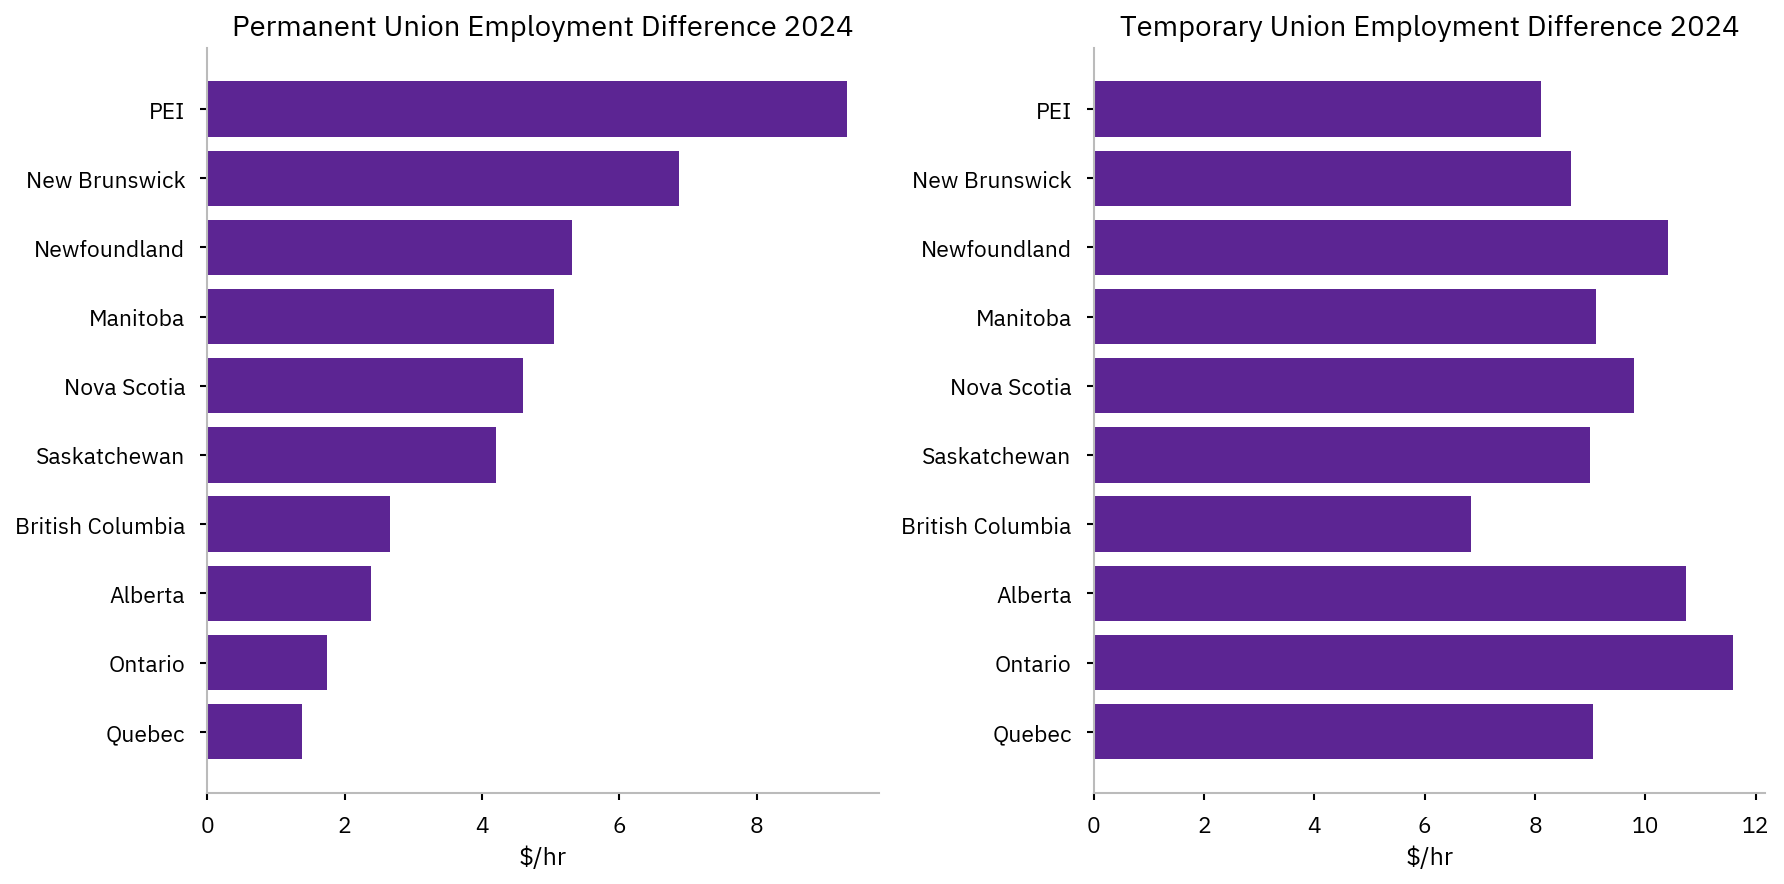

In [117]:
# Visualizing Provinces
plotting_year = 2024

df_filtered_prov = df_provincial_data[df_provincial_data['year'] == plotting_year].sort_values('perm_benefit', ascending=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))

ax1.barh(df_filtered_prov['province'], df_filtered_prov['perm_benefit'])
ax1.set_title(f"Permanent Union Employment Difference {plotting_year}")
ax1.set_xlabel("$/hr")

#df_filtered_prov = df_provincial_data[df_provincial_data['year'] == plotting_year].sort_values('temp_benefit', ascending=True)

ax2.barh(df_filtered_prov['province'], df_filtered_prov['temp_benefit'])
ax2.set_title(f"Temporary Union Employment Difference {plotting_year}")
ax2.set_xlabel("$/hr")

plt.tight_layout()
plt.show()


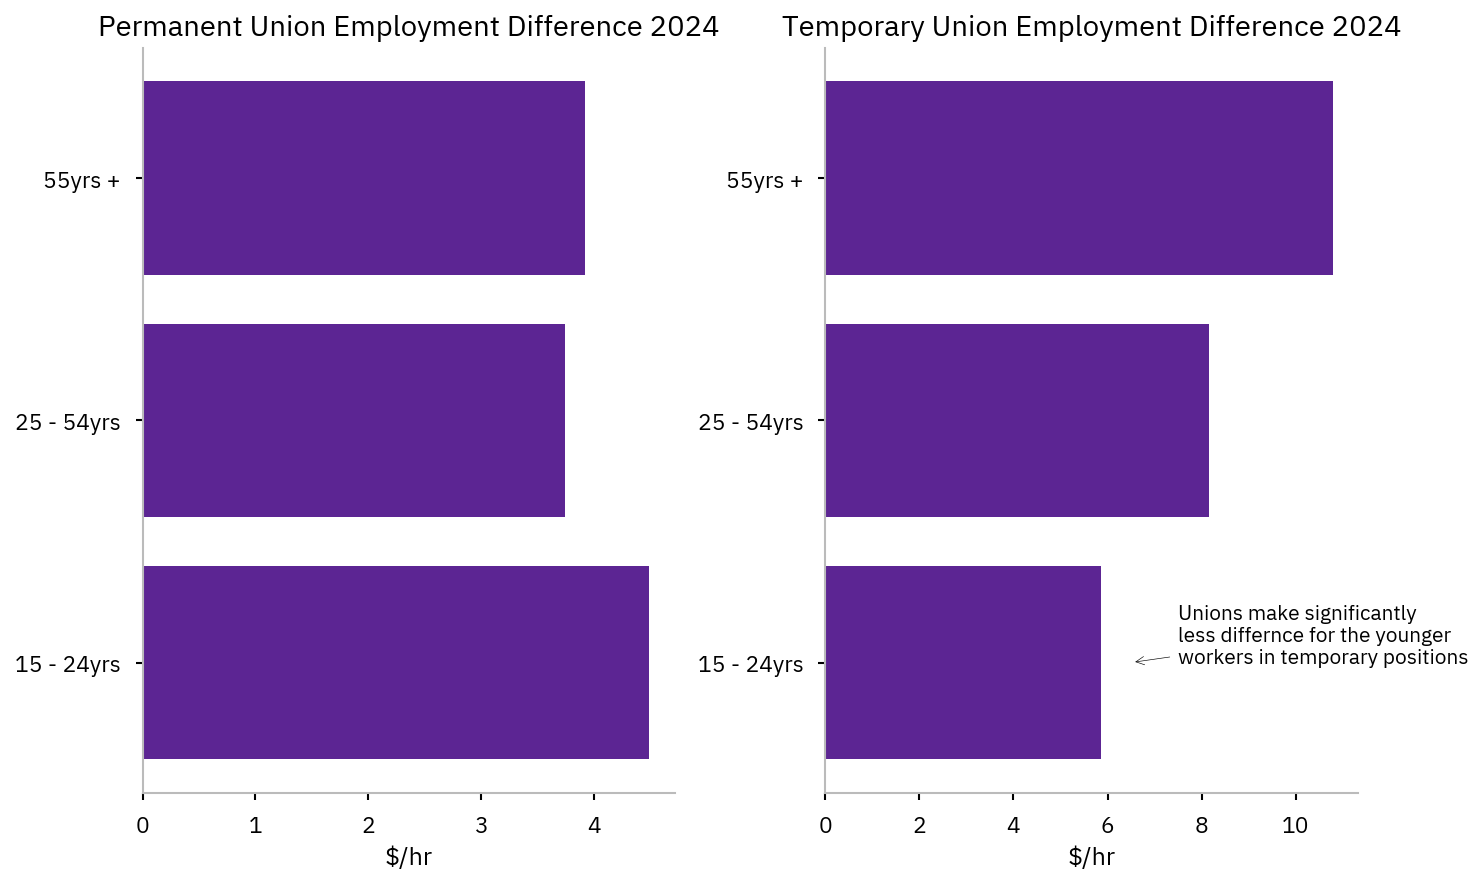

In [133]:
# Visualizing Provinces
plotting_year = 2024

df_filtered_age = df_age_groups[df_age_groups['year'] == plotting_year].sort_values('perm_benefit', ascending=True)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,6))

ax1.barh(df_age_groups['age_group'], df_age_groups['perm_benefit'])
ax1.set_title(f"Permanent Union Employment Difference {plotting_year}")
ax1.set_xlabel("$/hr")
ax1.set_xlim(left = 0)

#df_filtered_prov = df_provincial_data[df_provincial_data['year'] == plotting_year].sort_values('temp_benefit', ascending=True)

ax2.barh(df_age_groups['age_group'], df_age_groups['temp_benefit'])
ax2.set_title(f"Temporary Union Employment Difference {plotting_year}")
ax2.set_xlabel("$/hr")

ax2.annotate("Unions make significantly\nless differnce for the younger\nworkers in temporary positions",
             xy = (6.5, 0),
             xytext = (7.5, 0),
             arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3"),
             fontsize = 10
             )


plt.tight_layout()
plt.show()

Text(0.5, 0, '$/hr')

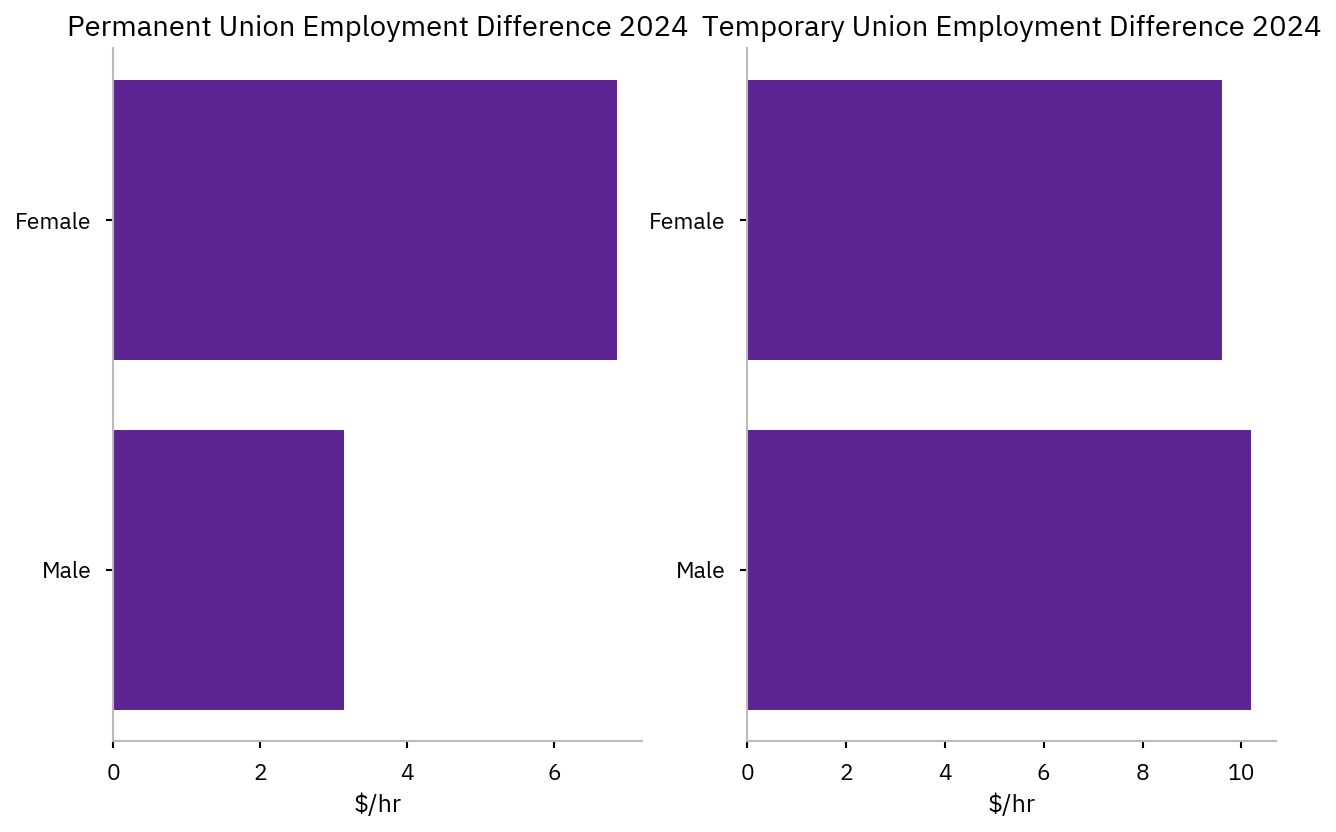

In [134]:
# Visualizing Provinces
plotting_year = 2024

df_filtered_gender = df_gender_data[df_gender_data['year'] == plotting_year].sort_values('perm_delta', ascending=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.barh(df_gender_data['gender'], df_gender_data['perm_delta'])
ax1.set_title(f"Permanent Union Employment Difference {plotting_year}")
ax1.set_xlabel("$/hr")
ax1.set_xlim(left=0)

#df_filtered_prov = df_provincial_data[df_provincial_data['year'] == plotting_year].sort_values('temp_benefit', ascending=True)

ax2.barh(df_gender_data['gender'], df_gender_data['temp_delta'])
ax2.set_title(f"Temporary Union Employment Difference {plotting_year}")
ax2.set_xlabel("$/hr")

In [ ]:
# Gender and Union no Union Iteraction?

